In [14]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

In [170]:
X_train = pd.read_csv('train_values.csv')
y_train = pd.read_csv('train_labels.csv')
X_test = pd.read_csv('test_values.csv')
X_train = X_train.drop('patient_id', axis=1)
y_train = y_train.drop('patient_id', axis=1)
X_test = X_test.drop('patient_id', axis=1)

In [171]:
cat_names = ['sex','chest_pain_type','thal']

for i in cat_names:
    column_names = []
    x = pd.get_dummies(X_train[i])
    for j in x.columns:
        column_names.append(f'{j}{i}')
    x.columns = column_names
    X_train = pd.concat([X_train, x], axis=1)
X_train = X_train.drop(cat_names, axis=1)
for i in cat_names:
    column_names = []
    x = pd.get_dummies(X_test[i])
    for j in x.columns:
        column_names.append(f'{j}{i}')
    x.columns = column_names
    X_test = pd.concat([X_test, x], axis=1)
X_test = X_test.drop(cat_names, axis=1)

In [175]:
from sklearn.utils import resample
X_train = pd.concat([X_train, y_train], axis=1)
df_majority = X_train[X_train.heart_disease_present==0]
df_minority = X_train[X_train.heart_disease_present==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
train = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
print(train.heart_disease_present.value_counts())
y_train = train['heart_disease_present'].copy()

# Drop target, fill in NaNs
X_train = train.drop('heart_disease_present', axis=1)

1    100
0    100
Name: heart_disease_present, dtype: int64


AttributeError: 'Series' object has no attribute 'shuffle'

,0,age,chest_pain_type,exercise_induced_angina,fasting_blood_sugar_gt_120_mg_per_dl,max_heart_rate_achieved,num_major_vessels,oldpeak_eq_st_depression,resting_blood_pressure,resting_ekg_results,serum_cholesterol_mg_per_dl,sex,slope_of_peak_exercise_st_segment,thal
0,NaN,45.0,2.0,0.0,0.0,170.0,0.0,0.0,128.0,2.0,308.0,1.0,1.0,normal
1,NaN,54.0,3.0,0.0,0.0,158.0,0.0,1.6,110.0,0.0,214.0,0.0,2.0,normal
4,NaN,59.0,1.0,0.0,0.0,145.0,0.0,4.2,178.0,2.0,270.0,1.0,3.0,reversible_defect
5,NaN,42.0,3.0,0.0,0.0,150.0,0.0,0.0,130.0,0.0,180.0,1.0,1.0,normal
9,NaN,50.0,3.0,0.0,0.0,158.0,0.0,1.6,120.0,0.0,219.0,0.0,2.0,normal
10,NaN,66.0,4.0,0.0,0.0,151.0,0.0,0.4,120.0,2.0,302.0,1.0,2.0,normal
11,NaN,42.0,4.0,0.0,0.0,178.0,0.0,0.0,140.0,0.0,226.0,1.0,1.0,normal
13,NaN,45.0,4.0,1.0,0.0,152.0,0.0,0.2,138.0,2.0,236.0,0.0,2.0,normal
16,NaN,45.0,2.0,0.0,0.0,175.0,0.0,0.6,130.0,2.0,234.0,0.0,2.0,normal
18,NaN,29.0,2.0,0.0,0.0,202.0,0.0,0.0,130.0,2.0,204.0,1.0,1.0,normal


In [186]:
df = X_train.copy()
scaler = StandardScaler()
norm = Normalizer()
pca = PCA(n_components=1,svd_solver='full')
for i in df.columns.to_list():
	x = df[i].values.astype(float)
	x = x.reshape(-1, 1)
	x_scaled = scaler.fit_transform(x)
	x_scaled = norm.fit_transform(x_scaled)
	x_scaled = pca.fit_transform(x_scaled)
	df[i] = x_scaled
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
	for n_components in n_components_range:
		gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type)
		gmm.fit(df)
		bic.append(gmm.aic(df))
		if bic[-1] < lowest_bic:
			lowest_bic = bic[-1]
			best_gmm = gmm
best_gmm.fit(df)
df = best_gmm.predict_proba(df)
X = np.array(df)
y = np.array(y_train)
target = to_categorical(y)

X, X_val, target, y_val = train_test_split(X,target,test_size=0.2)

import tensorflow as tf
from tensorflow.contrib.keras import layers
from tensorflow.contrib.keras import models
from keras import backend as K
import keras

class roc_callback(keras.callbacks.Callback):
    def __init__(self,training_data,validation_data):
        
        self.x = training_data[0]
        self.y = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]
        
    
    def on_train_begin(self, logs={}):
        return
 
    def on_train_end(self, logs={}):
        return
 
    def on_epoch_begin(self, epoch, logs={}):
        return
 
    def on_epoch_end(self, epoch, logs={}):        
        y_pred = self.model.predict(self.x)
        roc = roc_auc_score(self.y, y_pred)      
        
        y_pred_val = self.model.predict(self.x_val)
        roc_val = roc_auc_score(self.y_val, y_pred_val)      
        
        print('\rroc-auc: %s - roc-auc_val: %s' % (str(round(roc,4)),str(round(roc_val,4))),end=100*' '+'\n')
        return
 
    def on_batch_begin(self, batch, logs={}):
        return
 
    def on_batch_end(self, batch, logs={}):
        return   


callbacks=[roc_callback(training_data=X,validation_data=X_val)] 

model = models.Sequential()
num_inputs = X.shape[1]
num_hidden = [100, 150, 100, 50]
num_outputs = 2
model.add(layers.Dense(units=num_inputs, activation=tf.nn.relu, input_dim=X.shape[1]))
model.add(layers.Dense(units=num_hidden[1], activation=tf.nn.relu))

model.add(layers.Dense(units=num_hidden[1], activation=tf.nn.relu))

model.add(layers.Dense(units=num_hidden[2], activation=tf.nn.relu))

model.add(layers.Dense(units=num_hidden[3], activation=tf.nn.relu))
model.add(layers.Dense(units=num_outputs, activation=tf.nn.softmax))
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=[auc_roc])

model.fit(X, target, epochs=300)

Epoch 1/300


FailedPreconditionError: 2 root error(s) found.
  (0) Failed precondition: Attempting to use uninitialized value metrics_23/auc_roc/auc/true_negatives
	 [[{{node metrics_23/auc_roc/auc/true_negatives/read}}]]
	 [[ConstantFoldingCtrl/metrics_23/auc_roc/auc/assert_greater_equal/Assert/AssertGuard/Switch_0/_1130]]
  (1) Failed precondition: Attempting to use uninitialized value metrics_23/auc_roc/auc/true_negatives
	 [[{{node metrics_23/auc_roc/auc/true_negatives/read}}]]
0 successful operations.
0 derived errors ignored.

In [177]:
from sklearn.metrics import precision_recall_fscore_support

preds = model.predict(X_val)
y_pred = np.zeros(preds.shape[0])
y_validation = np.zeros(preds.shape[0])
for i in range(len(preds)):
    y_validation[i] = np.argmax(y_val[i])
    y_pred[i] = np.argmax(preds[i])
precision,recall,fscore,support = precision_recall_fscore_support(y_validation, y_pred)

In [87]:
models = []
models.append(('XGB', XGBClassifier(n_estimators=1000, max_depth=13)))
models.append(('RF', RandomForestClassifier(n_estimators=1000, max_depth=13, criterion='gini', random_state=42, n_jobs=-1)))
models.append(('KNN', KNeighborsClassifier()))

In [178]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_validation, y_pred)

array([[15, 10],
       [ 1, 14]], dtype=int64)

In [101]:
results = []
names = []
scoring = 'roc_auc'
for name, model in models:
	kfold = model_selection.KFold(n_splits=5, random_state=42)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

C:\Users\Micha\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Micha\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Micha\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Micha\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

XGB: 0.870824 (0.043826)


C:\Users\Micha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Micha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Micha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Micha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y wa

RF: 0.876726 (0.049939)
KNN: 0.598550 (0.080773)


C:\Users\Micha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Micha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Micha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Micha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y

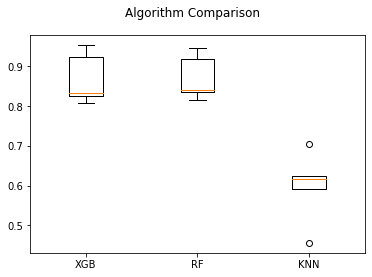

In [66]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [69]:
model = RandomForestClassifier(n_estimators=500, criterion='entropy', random_state=42, n_jobs=-1)
model.fit(X,y)
results = model.predict(X_test)

C:\Users\Micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [70]:
sub = pd.read_csv('submission_format.csv')
sub.heart_disease_present = pd.DataFrame(results)
sub.heart_disease_present = sub.heart_disease_present.astype(float)
sub.to_csv('submission2.csv',index=False)

In [65]:
sub.heart_disease_present = sub.heart_disease_present.astype(int)

In [66]:
sub

,patient_id,heart_disease_present
0,olalu7,0
1,z9n6mx,0
2,5k4413,1
3,mrg7q5,0
4,uki4do,1
5,kev1sk,0
6,9n6let,0
7,jxmtyg,1
8,51s2ff,0
9,wi9mcs,0


In [156]:
X_train.isnull().sum()

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64